# **Data Vizualization**

[Freddy Carrión Maldonado](https://www.linkedin.com/in/freddy-carri%C3%B3n-maldonado-b3579b125/)

## Contents

- **Part 1 - Plots with Matplotlib**
    - 1.1. Matplotlib Introduction
    - 1.2. Matplotlib Plotting
    - 1.3. Matplotlib Object Hierarchy
    - 1.4. Matplotlib Subplot
    - 1.5. Plots Examples

- **Part 2 - Plots with Seaborn** 
    - 2.1. Seaborn Introduction
    - 2.2. Styling Plots
    - 2.3. Multiple Plots
    - 2.4. Plots Examples

# Import Python Libraries

**NumPy:** (https://numpy.org/)
- introduces objects for multidimensional arrays and matrices, as well as functions that allow to easily perform advanced mathematical and statistical operations on those objects.
- Provides vectorization of mathematical operations on arrays and matrices which significantly improves the performance
- many other python libraries are built on NumPy.

**Pandas:** (https://pandas.pydata.org/)
- Adds data structures and tools designed to work with table-like data.
- Provides tools for data manipulation: reshaping, merging, sorting, slicing, aggregation etc.
- Allows handling missing data.

**Matplotlib:** (https://matplotlib.org/)
- Matplotlib is a low level graph plotting library in python that serves as a visualization utility.
- Matplotlib is open source and we can use it freely.
- It was mostly written in python, a few segments are written in C, Objective-C and Javascript for Platform compatibility.

**Seaborn:** (https://seaborn.pydata.org/)
- Seaborn is a Python data visualization library based on matplotlib.
- It provides a high-level interface for drawing attractive and informative statistical graphics.

**Plotly:** (https://plotly.com/)
- The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.
- Built on top of the Plotly JavaScript library (plotly.js), plotly enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
import plotly.express as px

# Part 1. Plots with Matplotlib

## Matplotlib Introduction

Most of the Matplotlib utilities lies under the **pyplot submodule**, and are usually imported under the **plt** alias.

![img1](Resources/Matplotlib_Anatomy.png)

*Figure 1. Matplotlib Anatomy*

## Matplotlib Plotting

The **plot() function** is used to draw points (markers) in a diagram. By default, the plot() function draws a line from point to point.

- The function takes parameters for specifying points in the diagram.

- Parameter 1 is an array containing the points on the x-axis.

- Parameter 2 is an array containing the points on the y-axis.

- If we need to plot a line from (1, 3) to (8, 10), we have to pass two arrays [1, 8] and [3, 10] to the plot function.


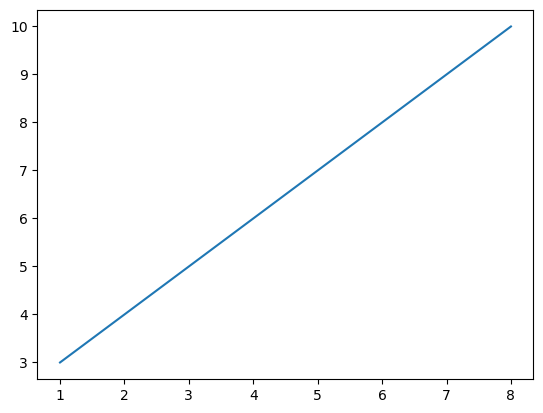

In [2]:
# Draw a line in a diagram from position (1, 3) to position (8, 10)

x = np.array([1, 8])
y = np.array([3, 10])

plt.plot(x, y)
plt.show()

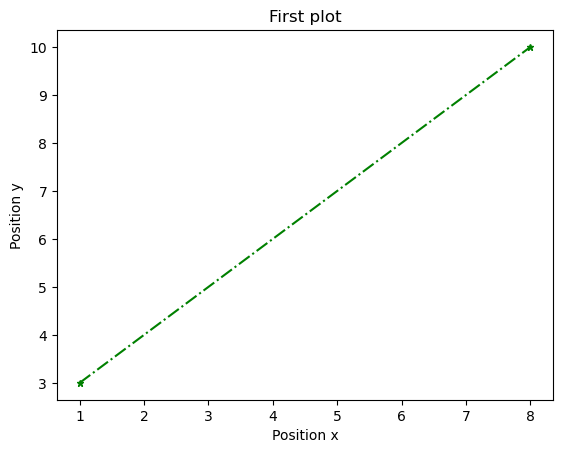

In [3]:
# Add labels, markers, color, and style and title

x = np.array([1, 8])
y = np.array([3, 10])

plt.plot(x, y, marker="*", ms=5, c='g', ls="-.")
plt.title("First plot")
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.show()

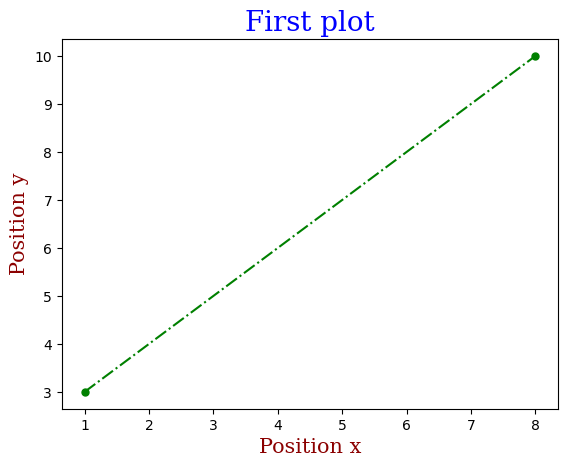

In [4]:
# Set font properties for title and labels

x = np.array([1, 8])
y = np.array([3, 10])

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.plot(x, y, marker="o", ms=5, c='g', ls="-.")
plt.title("First plot", fontdict = font1)
plt.xlabel("Position x", fontdict = font2)
plt.ylabel("Position y", fontdict = font2)
plt.show()

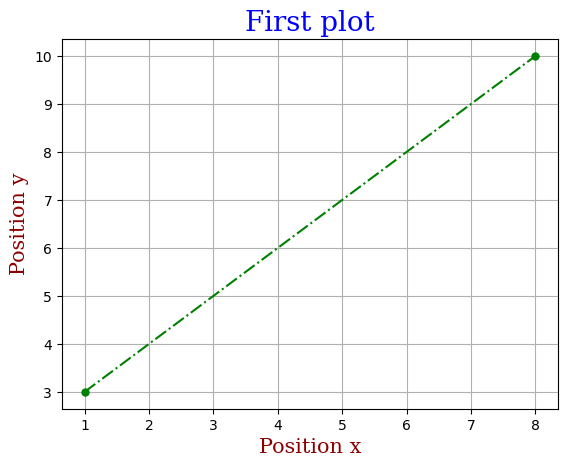

In [5]:
# Add gridlines

plt.plot(x, y, marker="o", ms=5, c='g', ls="-.")
plt.title("First plot", fontdict = font1)
plt.xlabel("Position x", fontdict = font2)
plt.ylabel("Position y", fontdict = font2)
plt.grid()
plt.show()

## Matplotlib Object Hierarchy

A matplotlib object is a tree-like structure of matplotlib objects which build a "hierarchy". The top of the tree-like structure of matplotlib objects is the figure object. A figure can be seen as the container which contains one or more plots. The plots are called axes in matplotlib jargon. Axes is the plural of the word "axis", which gives us a misleading idea. We can think about "axes" as a synonym for the word "plot". The following diagram shows a figure with one axes:

---
![img3](Resources/matplotlib_hierarchy.png)\
*Figure 2. Matplotlib object hierarchy*

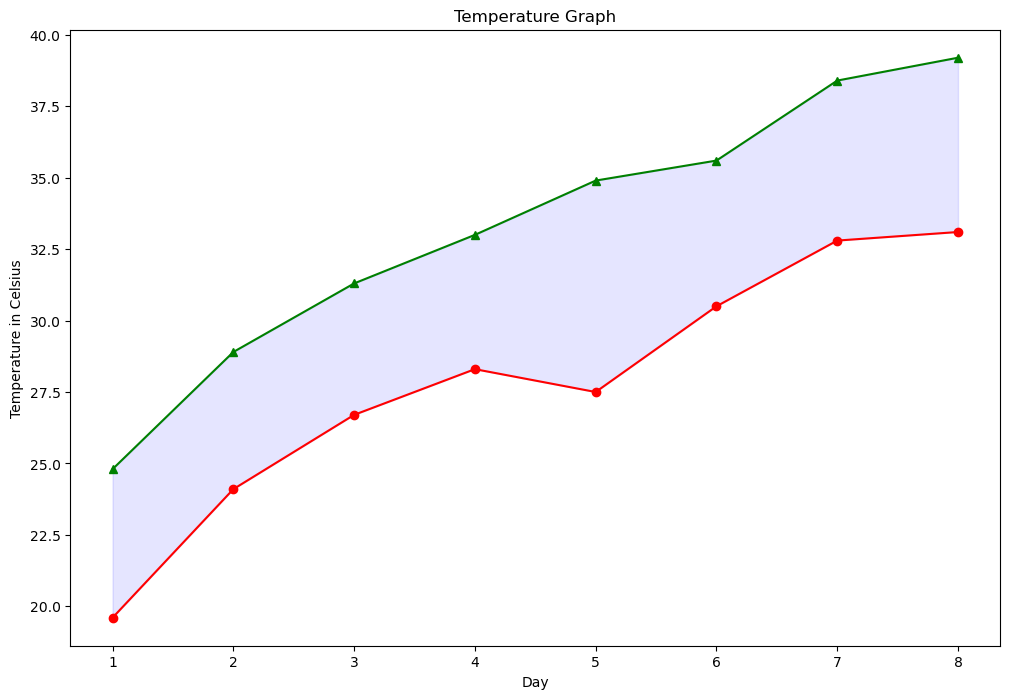

In [8]:
# Generate Figure and Axes 

# Insert data
days = np.arange(1, 9)
celsius_min = np.array([19.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1])
celsius_max = np.array([24.8, 28.9, 31.3, 33.0, 34.9, 35.6, 38.4, 39.2])

# Define objecs
fig, ax = plt.subplots(figsize=(12, 8))

# Make plots
ax.plot(days, celsius_min, marker="o", color="r")

ax.plot(days, celsius_max, marker="^", color="g")


# Set labels and title
ax.set(xlabel='Day', ylabel='Temperature in Celsius', title='Temperature Graph')

# Fill area
ax.fill_between(days, celsius_min, celsius_max, color='b', alpha=.1)

plt.show()

## Matplotlib Subplot

With the **subplots()** function you can draw multiple plots in one figure:

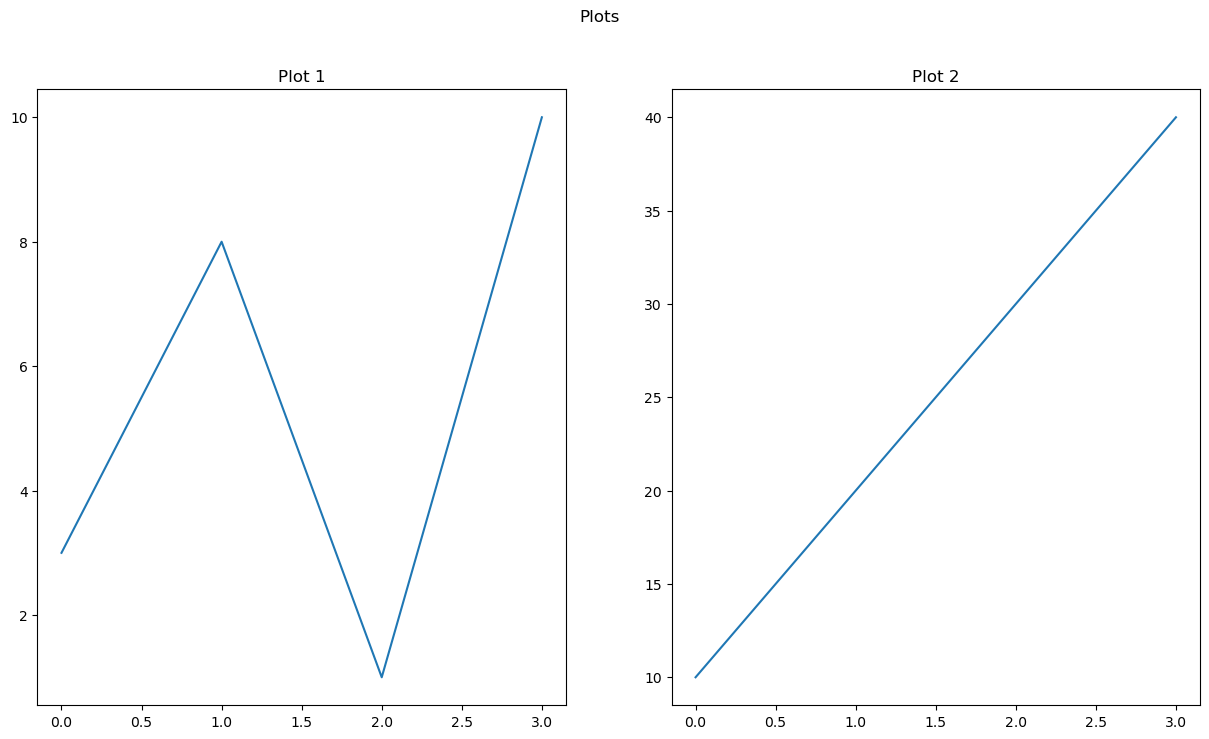

In [9]:
# Draw two plots

# plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

# Define objects
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].plot(x,y)
ax[0].set_title("Plot 1")

# # plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

ax[1].plot(x,y)
ax[1].set_title("Plot 2")

fig.suptitle("Plots")
plt.show()

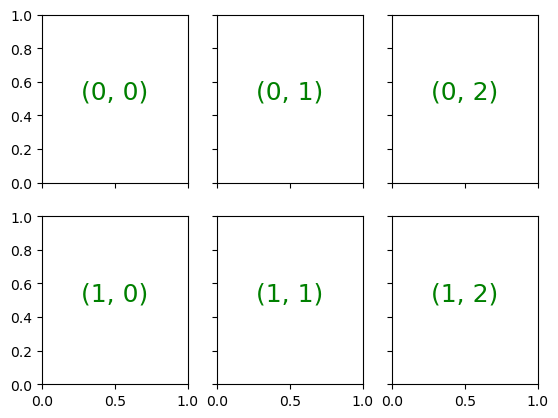

In [10]:
# Draw 6 plots using a for loop

rows, cols = 2, 3
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row')

for row in range(rows):
    for col in range(cols):
        ax[row, col].text(0.5, 0.5, 
                          str((row, col)),
                          color="green",
                          fontsize=18, 
                          ha='center')

plt.show()

## Main Plots

### Scatter Plots

With Pyplot, you can use the **scatter()** function to draw a scatter plot.

In [12]:
# Import CO2 emissions dataset

df_emi = pd.read_csv("Datos/CO2_Emi.csv")

# Filter data from 1900
df_emi = df_emi.loc[df_emi["Year"] > 1900]
df_emi.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
151,Afghanistan,AFG,1901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,Afghanistan,AFG,1902,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Afghanistan,AFG,1903,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Afghanistan,AFG,1904,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,Afghanistan,AFG,1905,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


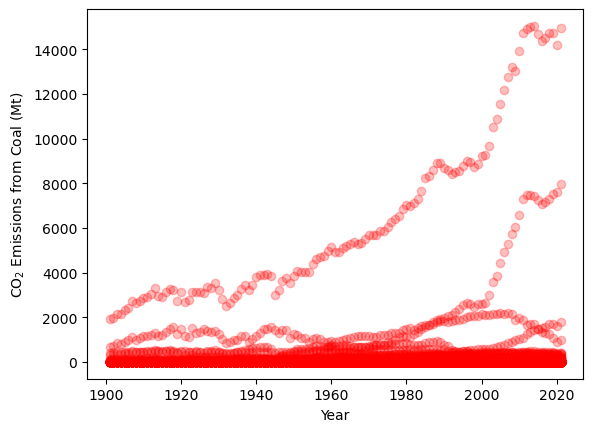

In [13]:
# plot a scatter plot

fig, ax =  plt.subplots()
ax.scatter(df_emi["Year"], df_emi["Coal"], c="r", alpha=0.25)

# Set labels
ax.set_xlabel("Year")
ax.set_ylabel("CO$_2$ Emissions from Coal (Mt)")
plt.show()

In [14]:
# Group data by year

df_emi1 = df_emi.groupby(["Year"])[["Oil", "Gas", "Coal"]].mean().reset_index()
df_emi1

,Year,Oil,Gas,Coal
0,1901,2.491676,0.428688,64.304397
1,1902,2.649447,0.449050,65.772588
2,1903,2.760059,0.468637,70.623043
3,1904,3.050266,0.481436,69.892374
4,1905,3.031775,0.536547,73.369617
...,...,...,...,...
116,2017,110.793013,64.953892,131.881580
117,2018,111.004672,68.453153,134.062097
118,2019,111.725370,69.522984,133.872528
119,2020,101.283335,68.693548,128.859673


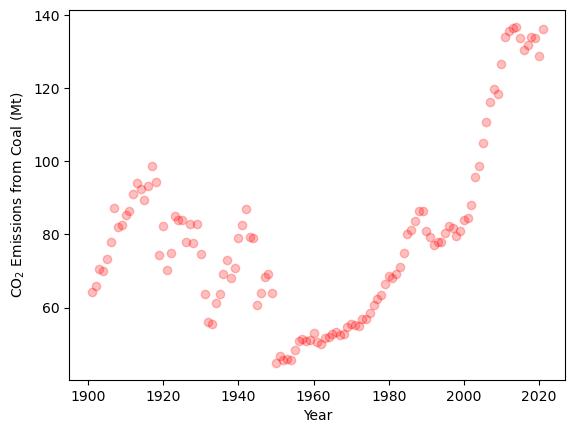

In [15]:
# plot a scatter plot with data grouped by year

fig, ax =  plt.subplots()
ax.scatter(df_emi1["Year"], df_emi1["Coal"], c="r", alpha=0.25)

# Set labels
ax.set_xlabel("Year")
ax.set_ylabel("CO$_2$ Emissions from Coal (Mt)")
plt.show()

### Line Plots

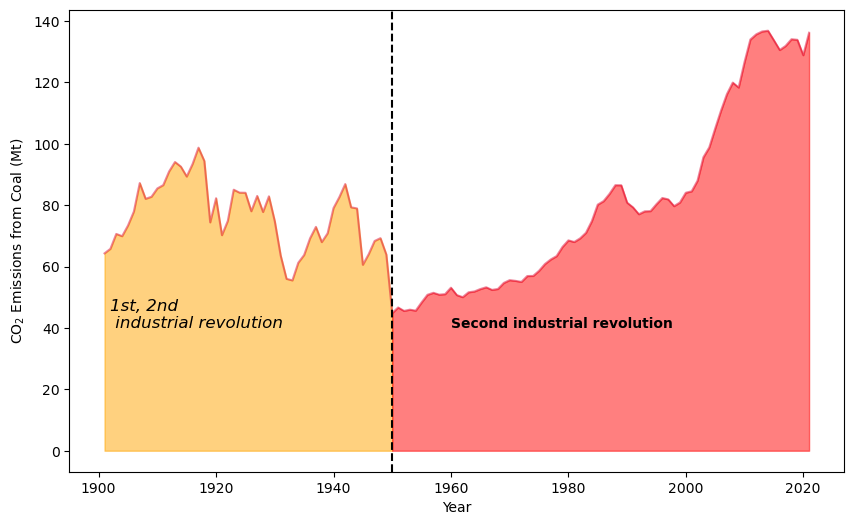

In [16]:
# plot a Line plot

# Convert the data to NumPy arrays
year = np.array(df_emi1["Year"])
coal_emissions = np.array(df_emi1["Coal"])
oil_emissions = np.array(df_emi1["Oil"])
gas_emissions = np.array(df_emi1["Gas"])

fig, ax =  plt.subplots(figsize=(10, 6))
ax.plot(year, coal_emissions, c="crimson", alpha=0.5)

# Set labels
ax.set_xlabel("Year")
ax.set_ylabel("CO$_2$ Emissions from Coal (Mt)")

# Add a vertical line in 1950
ax.axvline(x=1950, c="k", ls="--")

# # Fill with different colors around the year 1950
ax.fill_between(df_emi1["Year"][df_emi1["Year"]<=1950], 
                df_emi1["Coal"][df_emi1["Year"]<=1950],
                0, alpha=0.5, color="orange")
ax.fill_between(df_emi1["Year"][df_emi1["Year"]>=1950],
                  df_emi1["Coal"][df_emi1["Year"]>=1950], 0, alpha=0.5, color="red")

# # Add text around 1950
ax.text(1902, 40, "1st, 2nd \n industrial revolution", style="italic", fontsize=12)
ax.text(1960, 40, "Second industrial revolution", weight="bold")

plt.show()

In [21]:
fig.savefig("revolución.png")

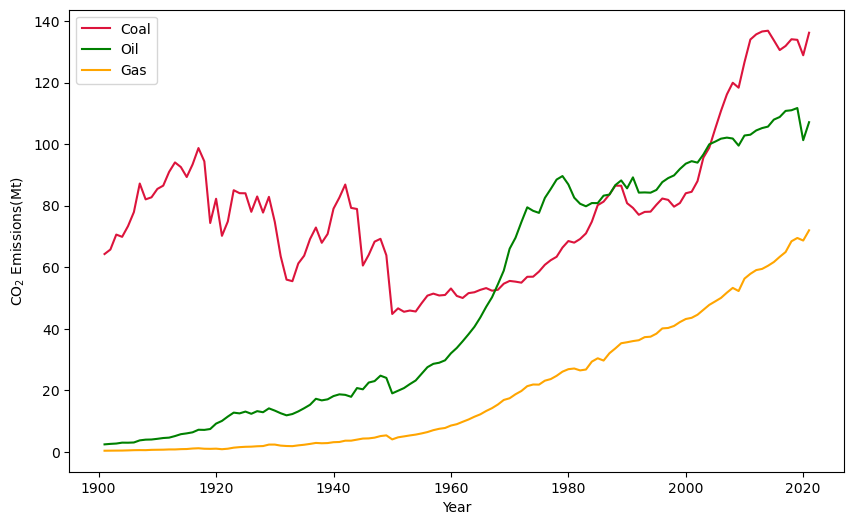

In [17]:
# PLot multiple line plots from various industries

fig, ax = plt.subplots(figsize=(10,6))

# Set line plots with colors and labels
ax.plot(year, coal_emissions, c="crimson", label="Coal")
ax.plot(year, oil_emissions, c="g", label="Oil")
ax.plot(year, gas_emissions, c="orange", label="Gas")

# Set labels
ax.set_xlabel("Year")
ax.set_ylabel("CO$_2$ Emissions(Mt)")

# # Set legend
ax.legend(loc=0)

plt.show()

,Country,Oil,Gas,Coal
8,Argentina,39.175880,24.549252,4.270145
24,Bolivia,3.458119,1.785450,0.004056
28,Brazil,94.600593,10.985964,20.575176
40,Chile,13.303835,2.644425,7.668655
43,Colombia,18.138475,6.576573,7.460373


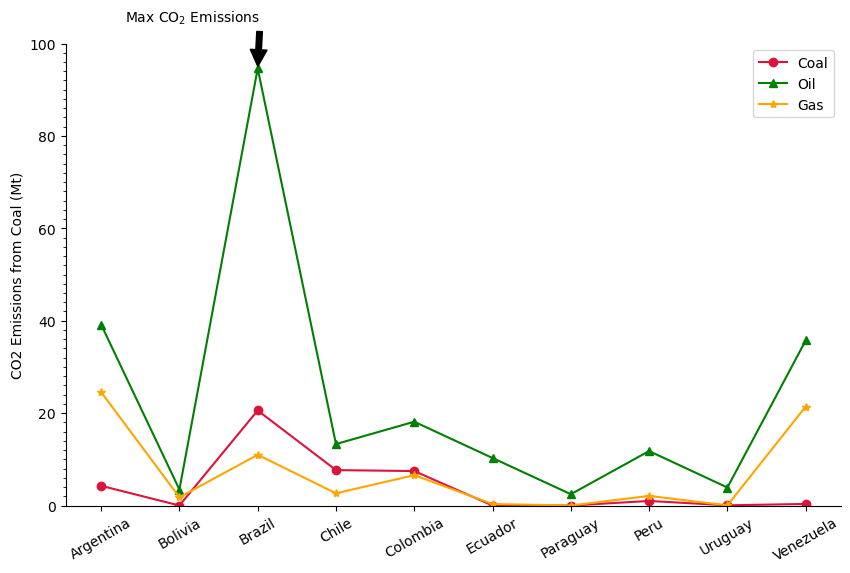

In [18]:
# Group data by countries from South America

# List of countries
South_america = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
                "Paraguay", "Peru", "Uruguay", "Venezuela"]

df_emi2 = df_emi.groupby("Country")[["Oil", "Gas", "Coal"]].mean().reset_index()
df_emi2 = df_emi2.loc[df_emi2["Country"].isin(South_america)]
display(df_emi2.head())

country = np.array(df_emi2["Country"])
coal_emi = np.array(df_emi2["Coal"])
oil_emi = np.array(df_emi2["Oil"])
gas_emi = np.array(df_emi2["Gas"])

# # Plot lines plots with data gropued by countries from South America
fig, ax =  plt.subplots(figsize=(10,6))

ax.plot(country, coal_emi, c="crimson", label="Coal", marker="o")
ax.plot(country, oil_emi, c="g", label="Oil", marker="^")
ax.plot(country, gas_emi, c="orange", label="Gas", marker="*")

# # Set labels names
# ax.set_xlabel("")
ax.set_ylabel("CO2 Emissions from Coal (Mt)")

# # Rotate xticks
#ax.set_xticklabels(["Argentina", "Ecuador", "Chile"], rotation=45)
ax.tick_params(axis="x", rotation=30)

# # Add legends
ax.legend(loc=0)

# # Hide two spines
ax.spines[["top", "right"]].set_visible(False)

# # Set minor ticks to 5
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

# Define limits
ax.set_ylim(0, 100)

# # Write an annotation
ax.annotate("Max CO$_2$ Emissions", xy=(2, df_emi2["Oil"].max()),
                                  xytext=(0.3, df_emi2["Oil"].max() + 10),
                                   arrowprops=dict(facecolor='black',
                                    shrink=0.05))
plt.show()

In [24]:
df_emi2.to_csv("Datos/CO2south.csv")

### Bars Plots

With Pyplot, you can use the **bar()** function to draw bar graphs:

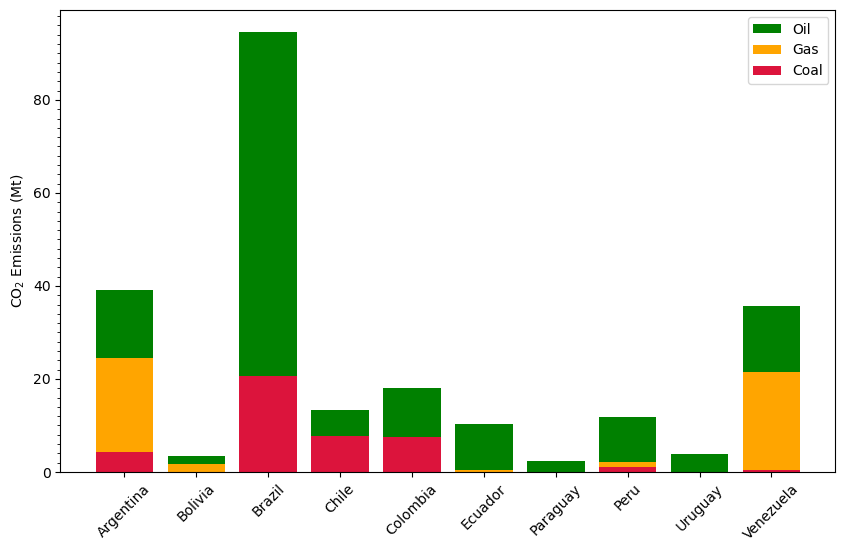

In [19]:
# Plot a bar plot with data grouped by Countries from South America

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df_emi2["Country"], df_emi2["Oil"], color="g", label="Oil", )
ax.bar(df_emi2["Country"], df_emi2["Gas"], color="orange", label="Gas")
ax.bar(df_emi2["Country"], df_emi2["Coal"], color="crimson", label="Coal")

# Set labels
ax.set_ylabel("CO$_2$ Emissions (Mt)")

# # Set Legends
ax.legend(loc=0)

# # Set ticks
ax.tick_params(axis="x", rotation=45)

# # Set minor ticks to 5
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.show()

### Histograms

In Matplotlib, we use the **hist()** function to create histograms. The hist() function will use an array of numbers to create a histogram, the array is sent into the function as an argument.

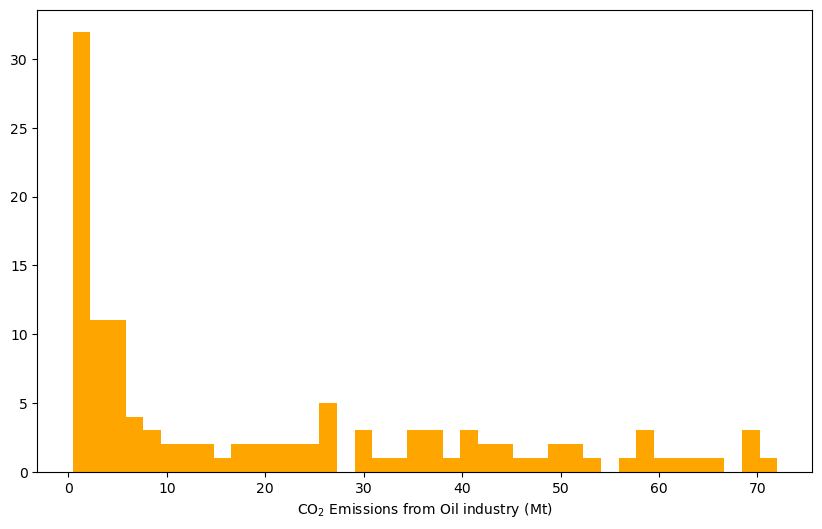

In [20]:
# Creat and histogram to see the distribution of CO2  emissions of any industry

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df_emi1["Gas"], bins=40, color="orange")

# Set labels
ax.set_xlabel("CO$_2$ Emissions from Oil industry (Mt)")


plt.show()

# Part 2. Plots with Seaborn

## Seaborn Introduction

**Seaborn** is a library mostly used for statistical plotting in Python. It is built on top of Matplotlib and provides beautiful default styles and color palettes to make statistical plots more attractive.

## Main Plots

### Bar Plots

To use this plot we choose a categorical column for the x axis and a numerical column for the y axis and we see that it creates a plot taking a mean per categorical column. It can be created using the **barplot()** method.

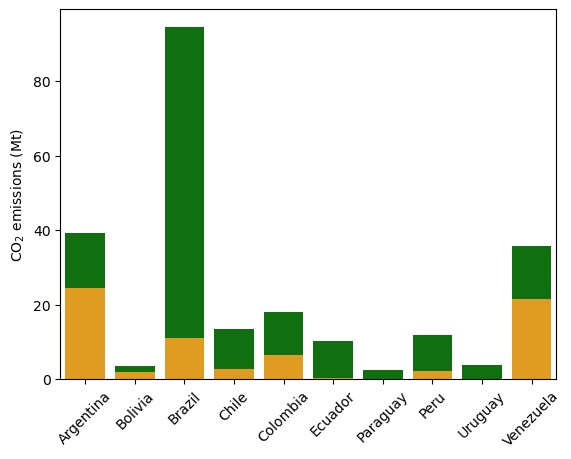

In [23]:
# Plot a bar plot of emissions by country

fig, ax = plt.subplots()

sns.barplot(x="Country", y="Coal", data=df_emi2, color="red", ax = ax)
sns.barplot(x="Country", y="Oil", data=df_emi2, color="green", ax = ax)
sns.barplot(x="Country", y="Gas", data=df_emi2, color="orange", ax = ax)

# Set labels
ax.set_xlabel("")
ax.set_ylabel("CO$_2$ emissions (Mt)")
# Rorate x lables
ax.tick_params(axis="x", rotation=45)

plt.show()

### Box Plots

A boxplot is sometimes known as the box and whisker plot.It shows the distribution of the quantitative data that represents the comparisons between variables. boxplot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution i.e. the dots indicating the presence of outliers. It is created using the **boxplot()** method.

In [24]:
# Filter data for South American countries
south_america = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Paraguay", "Peru", "Uruguay", "Venezuela"]
df_sa = df_emi[df_emi["Country"].isin(south_america)]
df_sa.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
2327,Argentina,ARG,1901,2.491520,2.491520,0.0,0.0,NaN,0.0,NaN,NaN
2328,Argentina,ARG,1902,2.813952,2.813952,0.0,0.0,NaN,0.0,NaN,NaN
2329,Argentina,ARG,1903,2.861584,2.861584,0.0,0.0,NaN,0.0,NaN,NaN
2330,Argentina,ARG,1904,3.795904,3.795904,0.0,0.0,NaN,0.0,NaN,NaN
2331,Argentina,ARG,1905,3.982768,3.982768,0.0,0.0,NaN,0.0,NaN,NaN


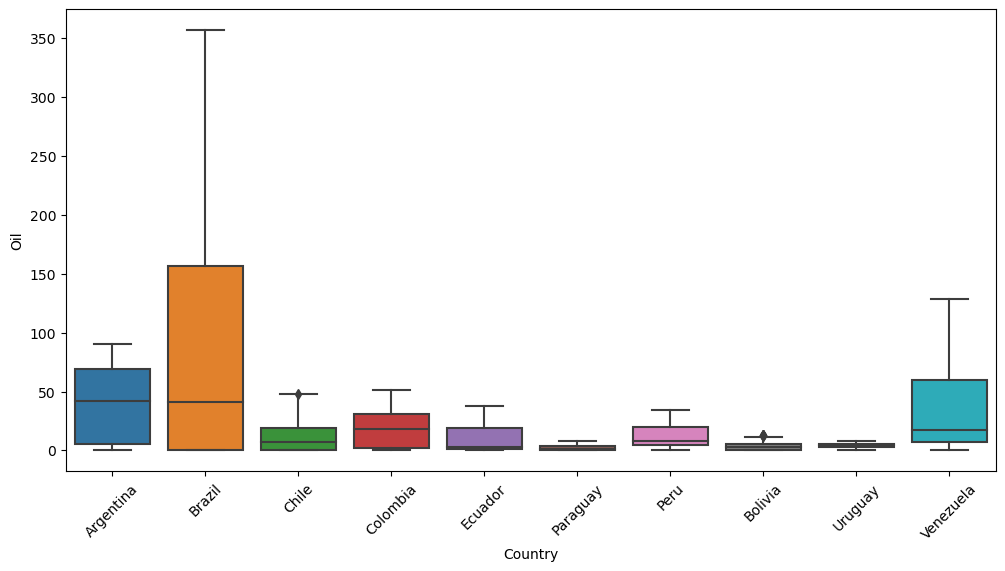

In [25]:
# Make a box plot of CO2 emissions from oil industry of South american countries

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x="Country", y="Oil", data=df_sa, ax=ax)
ax.tick_params(axis="x", rotation=45)

plt.show()

In [26]:
# Order countries by CO2 emissions in a descendet order 

order_oil = df_sa.sort_values(by="Oil", ascending=False)["Country"].unique()
order_oil

array(['Brazil', 'Venezuela', 'Argentina', 'Colombia', 'Chile', 'Ecuador',
       'Peru', 'Bolivia', 'Paraguay', 'Uruguay'], dtype=object)

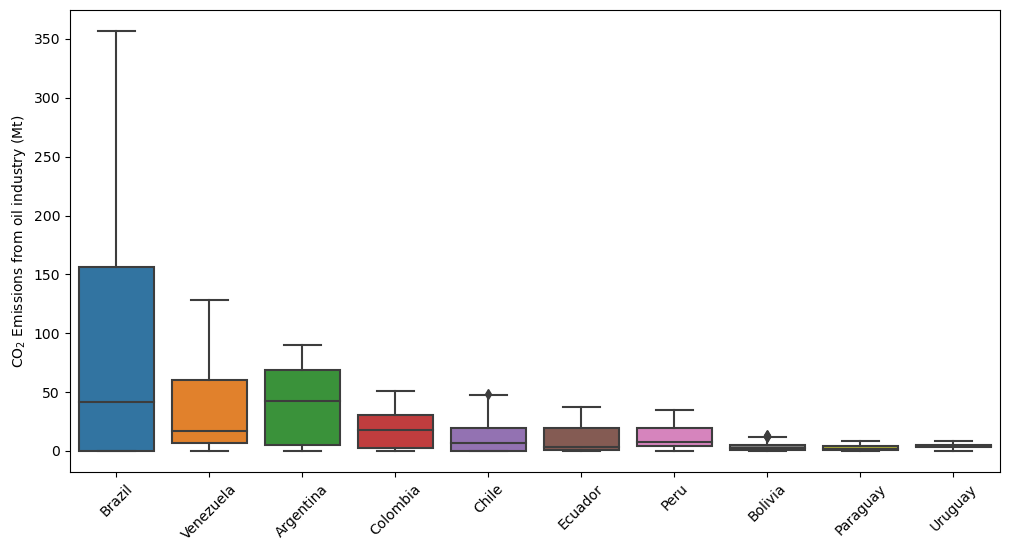

In [27]:
# Make a box plot of CO2 emissions from oil industry of South american countries in a descendent order

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x="Country", y="Oil", data=df_sa, order = order_oil, ax=ax)

# Rotate x labels
ax.tick_params(axis="x", rotation=45)

# Set labels
ax.set_xlabel("")
ax.set_ylabel("CO$_2$ Emissions from oil industry (Mt)")

plt.show()

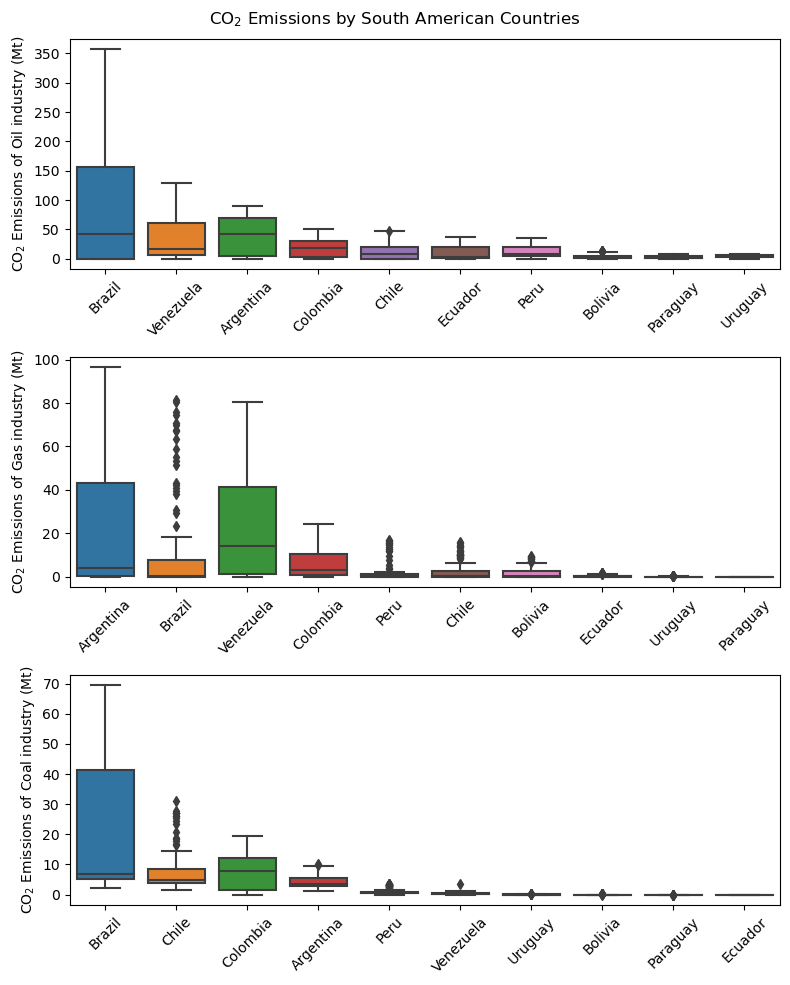

In [28]:
# Plot a box plot of CO2 emissions from oil, gas, and coal industris from countries of South America

indus = ["Oil", "Gas", "Coal"]

fig, ax = plt.subplots(len(indus), 1, figsize=(8, 10))

# Create the box plots
for axes, ind in zip(ax, indus):
    sns.boxplot(x="Country", y=ind, data=df_sa,
                 order = df_sa.sort_values(by=ind, ascending=False)["Country"].unique(), ax=axes)

# Set labels and title
    axes.set_xlabel("")
    axes.set_ylabel("CO$_2$ Emissions of {} industry (Mt)".format(ind))

# Rotate x-axis labels
    axes.tick_params(axis="x", rotation=45)

# Set title 
fig.suptitle("CO$_2$ Emissions by South American Countries")
# Show the plot
plt.tight_layout()

### Pair Plots

Pairplot represents pairwise relation across the entire dataframe and supports an additional argument called hue for categorical separation. What it does basically is create a jointplot between every possible numerical column and takes a while if the dataframe is really huge. It is plotted using the **pairplot()** method.

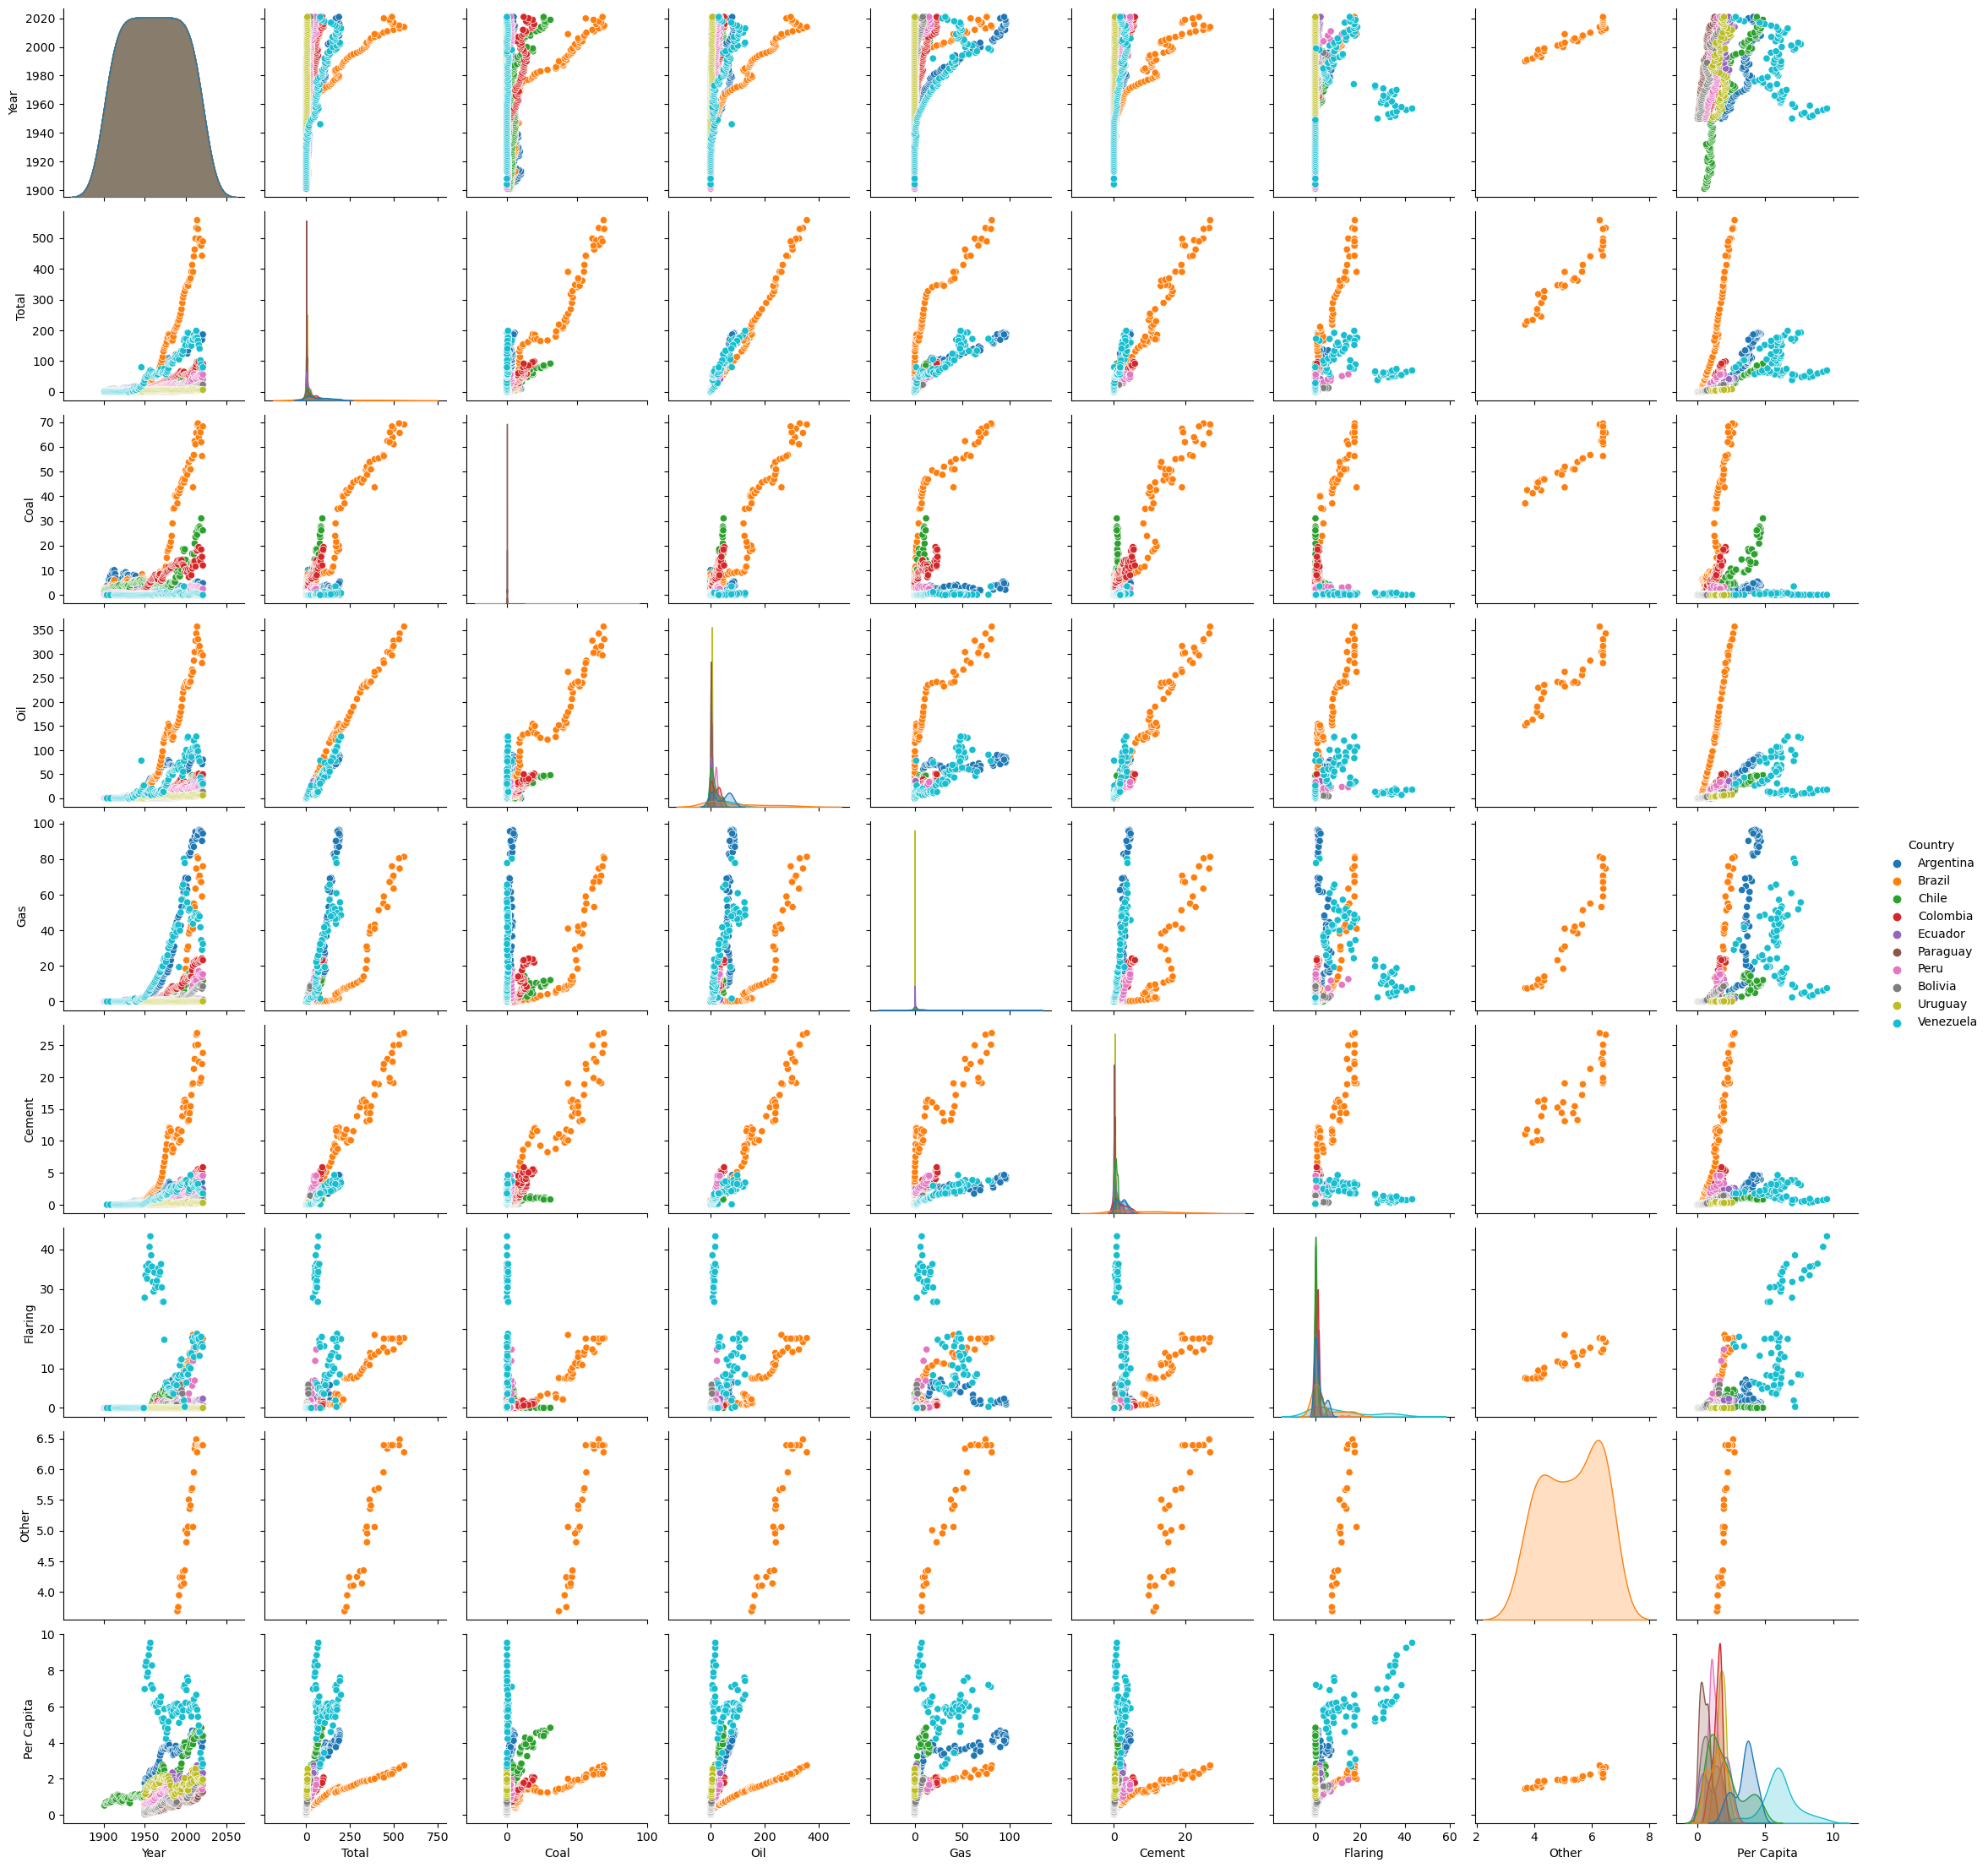

In [29]:
# Make a pair plot of CO2 Emissions from sout american countries

sns.pairplot(df_sa, hue="Country")
plt.show()

### Heatmaps

Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. it can be plotted using the **heatmap()** function.

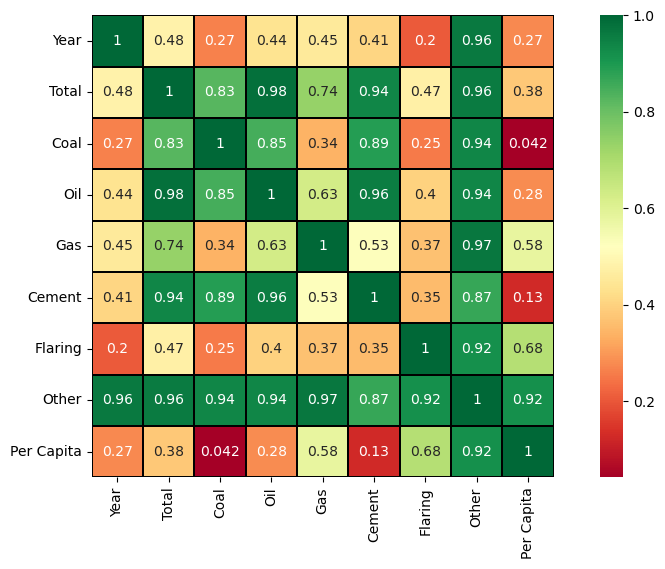

In [35]:
# Make a heatmap to show the correlations of numerical variables

fig, ax = plt.subplots(figsize=(12, 6))
cor = df_sa.corr(numeric_only=True)

sns.heatmap(cor, cmap='RdYlGn', annot=True, linewidths=0.01, linecolor='black', square=True, ax=ax)
plt.show()